In [41]:
import os
import sys

In [42]:
def get_last_objective(path: str) -> int:
    with open(path, "r") as f:
        lines = f.readlines()

    # Last non-empty line
    _, _, objective = lines[-1].split(",")

    return int(objective)

In [43]:
objectives = []

for filename in os.listdir("../grasp_tuning"):
    name, ext = os.path.splitext(filename)

    if ext != ".out":
        continue

    print(name)
    instance, size, run, alpha, i = name.split("-")

    size = int(size)
    #    run = int(run)
    alpha = float(alpha)
    i = int(i)

    instance = instance + "-" + run

    try:
        objective = get_last_objective(f"../grasp_tuning/{filename}")
    except Exception as e:
        print(e)
        print(f"Error reading {filename}", file=sys.stderr)
        continue
    objectives.append((instance, size, alpha, i, objective))

knapsack-50-1-0.5-5
knapsack-50-1-0.3-3
bin_packing-50-1-0.9-4
knapsack-50-1-0.1-1
mix-50-1-0.9-1
bin_packing-50-1-0.9-5
knapsack-50-1-0.3-2
knapsack-50-1-0.5-4
knapsack-50-1-0.7-4
knapsack-50-1-0.1-2
mix-50-1-0.9-2
mix-50-1-0.9-3
knapsack-50-1-0.1-3
knapsack-50-1-0.3-1
knapsack-50-1-0.7-5
knapsack-50-1-0.7-1
knapsack-50-1-0.5-3
bin_packing-50-1-0.9-2
knapsack-50-1-0.3-5
knapsack-50-1-0.3-4
bin_packing-50-1-0.9-3
knapsack-50-1-0.5-2
knapsack-50-1-0.7-2
bin_packing-50-1-0.9-1
mix-50-1-0.9-4
list index out of range
knapsack-50-1-0.1-4
knapsack-50-1-0.1-5
knapsack-50-1-0.5-1
knapsack-50-1-0.7-3
knapsack-50-1-0.0-2
mix-50-1-0.8-2
knapsack-50-1-0.6-4
knapsack-50-1-0.6-5
knapsack-50-1-0.2-1
mix-50-1-0.8-3
knapsack-50-1-0.0-3
knapsack-50-1-0.0-1
mix-50-1-0.8-1
knapsack-50-1-0.2-3
knapsack-50-1-1.0-4
bin_packing-50-1-0.8-4
knapsack-50-1-0.4-5
knapsack-50-1-0.4-4
bin_packing-50-1-0.8-5
knapsack-50-1-1.0-5
knapsack-50-1-0.2-2
mix-50-1-0.8-4
knapsack-50-1-0.0-4
bin_packing-50-1-0.8-1
knapsack-50-

Error reading mix-50-1-0.9-4.out


In [44]:
objectives

[('knapsack-1', 50, 0.5, 5, 2005),
 ('knapsack-1', 50, 0.3, 3, 1992),
 ('bin_packing-1', 50, 0.9, 4, 4775),
 ('knapsack-1', 50, 0.1, 1, 1927),
 ('mix-1', 50, 0.9, 1, 10648),
 ('bin_packing-1', 50, 0.9, 5, 4819),
 ('knapsack-1', 50, 0.3, 2, 1992),
 ('knapsack-1', 50, 0.5, 4, 2003),
 ('knapsack-1', 50, 0.7, 4, 2003),
 ('knapsack-1', 50, 0.1, 2, 1927),
 ('mix-1', 50, 0.9, 2, 10706),
 ('mix-1', 50, 0.9, 3, 10781),
 ('knapsack-1', 50, 0.1, 3, 1927),
 ('knapsack-1', 50, 0.3, 1, 1992),
 ('knapsack-1', 50, 0.7, 5, 2003),
 ('knapsack-1', 50, 0.7, 1, 1996),
 ('knapsack-1', 50, 0.5, 3, 2003),
 ('bin_packing-1', 50, 0.9, 2, 4775),
 ('knapsack-1', 50, 0.3, 5, 1992),
 ('knapsack-1', 50, 0.3, 4, 1992),
 ('bin_packing-1', 50, 0.9, 3, 4875),
 ('knapsack-1', 50, 0.5, 2, 2003),
 ('knapsack-1', 50, 0.7, 2, 2003),
 ('bin_packing-1', 50, 0.9, 1, 4858),
 ('knapsack-1', 50, 0.1, 4, 1927),
 ('knapsack-1', 50, 0.1, 5, 1927),
 ('knapsack-1', 50, 0.5, 1, 2003),
 ('knapsack-1', 50, 0.7, 3, 2005),
 ('knapsack-1', 5

In [45]:
import pandas as pd

# Columns: alpha, instance, run, objective
df = pd.DataFrame(objectives, columns=["instance", "size", "alpha", "run", "objective"])

<Axes: xlabel='alpha'>

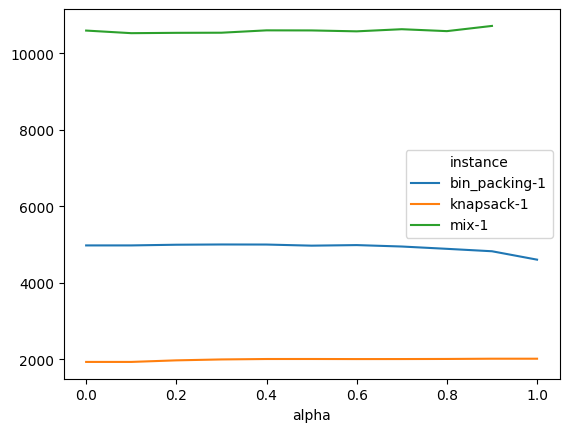

In [46]:
df.groupby(["alpha", "instance"])["objective"].mean().unstack().plot()

In [47]:
mean_objective_df = df.groupby(["instance", "alpha"])["objective"].mean().to_frame()
mean_objective_df

objective
instance      alpha              
bin_packing-1 0.0     4973.000000
              0.1     4973.000000
              0.2     4991.000000
              0.3     4997.600000
              0.4     4995.800000
              0.5     4966.800000
              0.6     4981.400000
              0.7     4944.200000
              0.8     4883.800000
              0.9     4820.400000
              1.0     4600.800000
knapsack-1    0.0     1927.000000
              0.1     1927.000000
              0.2     1968.000000
              0.3     1992.000000
              0.4     2003.000000
              0.5     2003.400000
              0.6     2001.400000
              0.7     2002.000000
              0.8     2004.600000
              0.9     2011.000000
              1.0     2011.000000
mix-1         0.0    10590.200000
              0.1    10522.200000
              0.2    10531.000000
              0.3    10534.000000
              0.4    10595.800000
              0.5    10593.800000
              0.6    10570.000000
              0.7    10625.600000
              0.8    10575.400000
              0.9    10711.666667

In [48]:
df.groupby(["instance", "alpha"])["objective"].max().to_frame()


objective
instance      alpha           
bin_packing-1 0.0         4973
              0.1         4973
              0.2         4991
              0.3         5000
              0.4         5000
              0.5         4975
              0.6         5000
              0.7         4964
              0.8         4939
              0.9         4875
              1.0         4674
knapsack-1    0.0         1927
              0.1         1927
              0.2         1968
              0.3         1992
              0.4         2003
              0.5         2005
              0.6         2003
              0.7         2005
              0.8         2005
              0.9         2011
              1.0         2011
mix-1         0.0        10617
              0.1        10574
              0.2        10574
              0.3        10720
              0.4        10645
              0.5        10673
              0.6        10688
              0.7        10717
              0.8        10742
              0.9        10781

/var/folders/l4/6df7tsp54kj1yssvqs1v5k1r0000gn/T/ipykernel_89497/1520340433.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/l4/6df7tsp54kj1yssvqs1v5k1r0000gn/T/ipykernel_89497/1520340433.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/l4/6df7tsp54kj1yssvqs1v5k1r0000gn/T/ipykernel_89497/1520340433.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


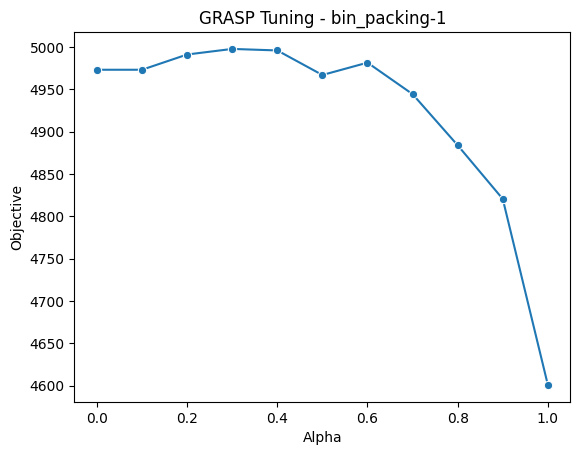

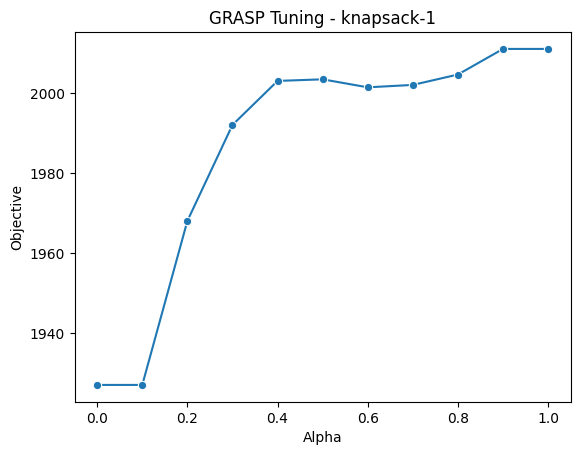

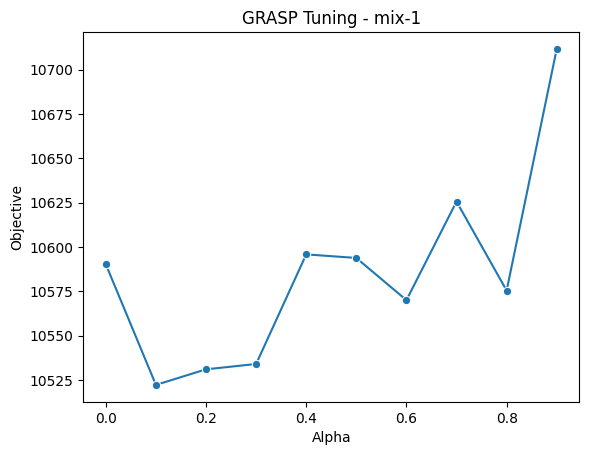

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for each instance
for instance in mean_objective_df.index.levels[0]:
    fig, ax = plt.subplots()

    sns.lineplot(
        x="alpha",
        y="objective",
        data=mean_objective_df.loc[instance],
        marker="o",
        ax=ax,
    )
#    ax.set_ylim(3400, 3600)


    ax.set_xlabel("Alpha")
    ax.set_ylabel("Objective")
    ax.set_title(f"GRASP Tuning - {instance}")

    fig.show()
    #fig.savefig(f"grasp_tuning_{instance}.png", dpi=300, bbox_inches="tight")


# fig, ax = plt.subplots()


# sns.lineplot(
#     x="alpha",
#     y="objective",
#     data=mean_objective_df,
#     hue="instance",
#     marker="o",
#     ax=ax,
# )

# ax.set_xlabel("Alpha")
# ax.set_ylabel("Objective")
# ax.set_title("GRASP Tuning")
# plt.legend(title="Run")

# fig.savefig("grasp_tuning.png", dpi=300, bbox_inches="tight")

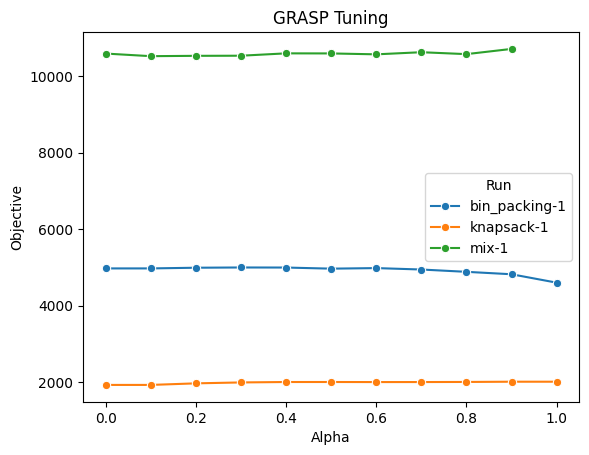

In [50]:

fig, ax = plt.subplots()


sns.lineplot(
    x="alpha",
    y="objective",
    data=mean_objective_df,
    hue="instance",
    marker="o",
    ax=ax,
)

ax.set_xlabel("Alpha")
ax.set_ylabel("Objective")
ax.set_title("GRASP Tuning")
plt.legend(title="Run")

fig.savefig("grasp_tuning.png", dpi=300, bbox_inches="tight")